In [1]:
from pylab import *
%matplotlib inline

In [3]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [22]:
def e_mov(r_v,t,fric=0,k=1,q=1,q_o=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = -k*r_v[0] + q_o*q*r_v[0]/(sqrt(r_v[0]**2+r_v[1]**2))*1.5,-k*r_v[1] + q_o*q*r_v[1]/(sqrt(r_v[0]**2+r_v[1]**2))*1.5
        #print "No use un modelo de friccion"
    else:    
        dvx = -k*r_v[0] + q_o*q*r_v[0]/(sqrt(r_v[0]**2+r_v[1]**2))*1.5 - fric([dx,dy])[0]
        dvy = -k*r_v[1] + q_o*q*r_v[1]/(sqrt(r_v[0]**2+r_v[1]**2))*1.5 - fric([dx,dy])[0]
        #print "No use un modelo de friccion" - fric([dx,dy])[1]
    return array([dx,dy,dvx,dvy])

In [23]:
def fric_v(v,gamma=0.1,mu=0.2):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    if norm_v < 1:
        f_x = gamma*v[0]
        f_y = gamma*v[1]
    else:    
        f_x = mu*(norm_v**(1.5))*v[0]
        f_y = mu*(norm_v**(1.5))*v[1]
    return array([f_x,f_y]) 

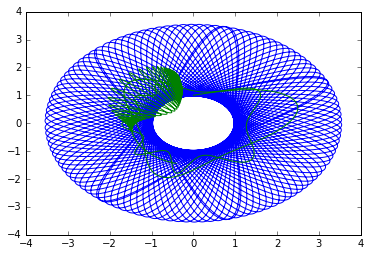

In [71]:
p = [0,1,2,.5]
t,sol_id=rk4(e_mov,p,[0,500])
t,sol_fv=rk4(e_mov,p,[0,500],fric_v)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])

show()

1.12500012875


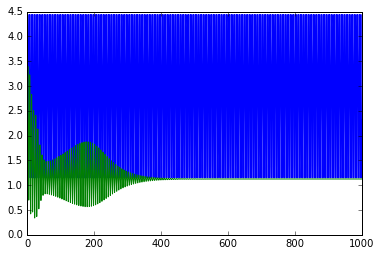

In [59]:
p = [0,1,1,1]
t,sol_id=rk4(e_mov,p,[0,1000])
t,sol_fv=rk4(e_mov,p,[0,1000],fric_v)
norm_v_id = (sol_id[:,2]**2 + sol_id[:,3]**2)
norm_r_id = (sol_id[:,0]**2 + sol_id[:,1]**2)
norm_v_fv = (sol_fv[:,2]**2 + sol_fv[:,3]**2)
norm_r_fv = (sol_fv[:,0]**2 + sol_fv[:,1]**2)
E_id = .5*(norm_v_id + norm_r_id)
E_fv = .5*(norm_v_fv + norm_r_fv)
print E_fv[-1]   
plot(t,E_id,t,E_fv)
show()